
Atividade Prática - CIN0208 Ciência de Dados
Dataset: [Spambase (OpenML ID: 44)](https://www.openml.org/search?type=data&sort=runs&id=44&status=active)
Objetivo: Avaliar o impacto de técnicas de scaling no desempenho do KNN


In [112]:
# IMPORTAÇÃO DE BIBLIOTECAS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import (
    StandardScaler, 
    MinMaxScaler, 
    MaxAbsScaler, 
    RobustScaler,
    QuantileTransformer
)
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import warnings

warnings.filterwarnings('ignore') # Ignorar avisos

# Configuração de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 80)
print("ATIVIDADE PRÁTICA - KNN COM SCALING")
print("Dataset: Spambase (OpenML ID: 44)")
print("Integrante: Luana Brito")
print("=" * 80)


ATIVIDADE PRÁTICA - KNN COM SCALING
Dataset: Spambase (OpenML ID: 44)
Integrante: Luana Brito


In [113]:
# 1. CARREGAMENTO E EXPLORAÇÃO DO DATASET

print("\n[1] CARREGANDO DATASET...")

# Carregar dataset do OpenML
spambase = fetch_openml(data_id=44, as_frame=True, parser='auto')
X = spambase.data
y = spambase.target

# Converter o target para numérico (0 e 1)
y = y.astype(int)

print(f"✓ Dataset carregado com sucesso!")

print(f"  - Instâncias: {X.shape[0]}")
print(f"  - Features: {X.shape[1]}")
print(f"  - Classes: {y.unique()}")
print(f"  - Distribuição do Alvo (y): Não-spam={sum(y==0)} ({sum(y==0)/len(y)*100:.1f}%), Spam={sum(y==1)} ({sum(y==1)/len(y)*100:.1f}%)")
print(y.value_counts(normalize=True))

# Verificar tipos de dados
print(f"\n[INFO] Tipos de features:")
print(f"  - Todas as {X.shape[1]} features são numéricas")
print(f"  - Não há variáveis categóricas (encoding não necessário)")


[1] CARREGANDO DATASET...
✓ Dataset carregado com sucesso!
  - Instâncias: 4601
  - Features: 57
  - Classes: [1 0]
  - Distribuição do Alvo (y): Não-spam=2788 (60.6%), Spam=1813 (39.4%)
class
0    0.605955
1    0.394045
Name: proportion, dtype: float64

[INFO] Tipos de features:
  - Todas as 57 features são numéricas
  - Não há variáveis categóricas (encoding não necessário)


In [114]:
# 2. DIVISÃO TREINO/TESTE

print("\n[2] DIVIDINDO DADOS EM TREINO E TESTE...")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y
)

print(f"Divisão realizada conforme a instrução (70% treino / 30% teste)")
print(f"  - Treino: {X_train.shape[0]} instâncias")
print(f"  - Teste: {X_test.shape[0]} instâncias")


[2] DIVIDINDO DADOS EM TREINO E TESTE...
Divisão realizada conforme a instrução (70% treino / 30% teste)
  - Treino: 3220 instâncias
  - Teste: 1381 instâncias


In [115]:
# 3. DEFINIÇÃO DOS CENÁRIOS DE SCALERS

print("\n[3] CONFIGURANDO SCALERS...")

scalers = {
    'Sem Scaling': None,
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'MaxAbsScaler': MaxAbsScaler(),
    'RobustScaler': RobustScaler(),
    'QuantileTransformer (uniforme)': QuantileTransformer(output_distribution='uniform', random_state=42),
    'QuantileTransformer (normal)': QuantileTransformer(output_distribution='normal', random_state=42)
}

print(f"✓ {len(scalers)} técnicas de scaling configuradas")



[3] CONFIGURANDO SCALERS...
✓ 7 técnicas de scaling configuradas


In [116]:
# 4. TREINAMENTO E AVALIAÇÃO DO KNN

print("\n[4] TREINANDO E AVALIANDO MODELOS KNN COM DIFERENTES SCALERS...")

resultados = {
    'Scaling': [],
    'Acurácia': [],
    'F1-Score': []
}

for nome_scaler, scaler in scalers.items():
    print(f"\nTestando: {nome_scaler}")
    
    if scaler is None:
        X_train_scaled = X_train
        X_test_scaled = X_test
    else:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_scaled, y_train)
    
    y_pred = knn.predict(X_test_scaled)
    
    # Calcular métricas de classificação (Acurácia e F1-score)
    acuracia = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    resultados['Scaling'].append(nome_scaler)
    resultados['Acurácia'].append(acuracia)
    resultados['F1-Score'].append(f1)
    
    print(f"  → Acurácia: {acuracia:.4f}")
    print(f"  → F1-Score: {f1:.4f}")

print("TREINAMENTO CONCLUÍDO!")


[4] TREINANDO E AVALIANDO MODELOS KNN COM DIFERENTES SCALERS...

Testando: Sem Scaling
  → Acurácia: 0.7915
  → F1-Score: 0.7343

Testando: StandardScaler
  → Acurácia: 0.8993
  → F1-Score: 0.8709

Testando: MinMaxScaler
  → Acurácia: 0.8993
  → F1-Score: 0.8712

Testando: MaxAbsScaler
  → Acurácia: 0.8993
  → F1-Score: 0.8712

Testando: RobustScaler
  → Acurácia: 0.9015
  → F1-Score: 0.8752

Testando: QuantileTransformer (uniforme)
  → Acurácia: 0.9399
  → F1-Score: 0.9234

Testando: QuantileTransformer (normal)
  → Acurácia: 0.9283
  → F1-Score: 0.9088
TREINAMENTO CONCLUÍDO!


In [117]:
# 5. CRIAR DATAFRAME COM RESULTADOS

df_resultados = pd.DataFrame(resultados)

print("\n[5] TABELA DE RESULTADOS:")

print("-" * 80)
print(df_resultados.to_string(index=False))
print("-" * 80)

melhor_acuracia = df_resultados.loc[df_resultados['Acurácia'].idxmax()]
melhor_f1 = df_resultados.loc[df_resultados['F1-Score'].idxmax()]

print(f"\nMELHOR ACURÁCIA: {melhor_acuracia['Scaling']} ({melhor_acuracia['Acurácia']:.4f})")
print(f"MELHOR F1-SCORE: {melhor_f1['Scaling']} ({melhor_f1['F1-Score']:.4f})")


[5] TABELA DE RESULTADOS:
--------------------------------------------------------------------------------
                       Scaling  Acurácia  F1-Score
                   Sem Scaling  0.791455  0.734317
                StandardScaler  0.899348  0.870938
                  MinMaxScaler  0.899348  0.871177
                  MaxAbsScaler  0.899348  0.871177
                  RobustScaler  0.901521  0.875229
QuantileTransformer (uniforme)  0.939899  0.923361
  QuantileTransformer (normal)  0.928313  0.908756
--------------------------------------------------------------------------------

MELHOR ACURÁCIA: QuantileTransformer (uniforme) (0.9399)
MELHOR F1-SCORE: QuantileTransformer (uniforme) (0.9234)



[6] GERANDO GRÁFICOS COMPARATIVOS...


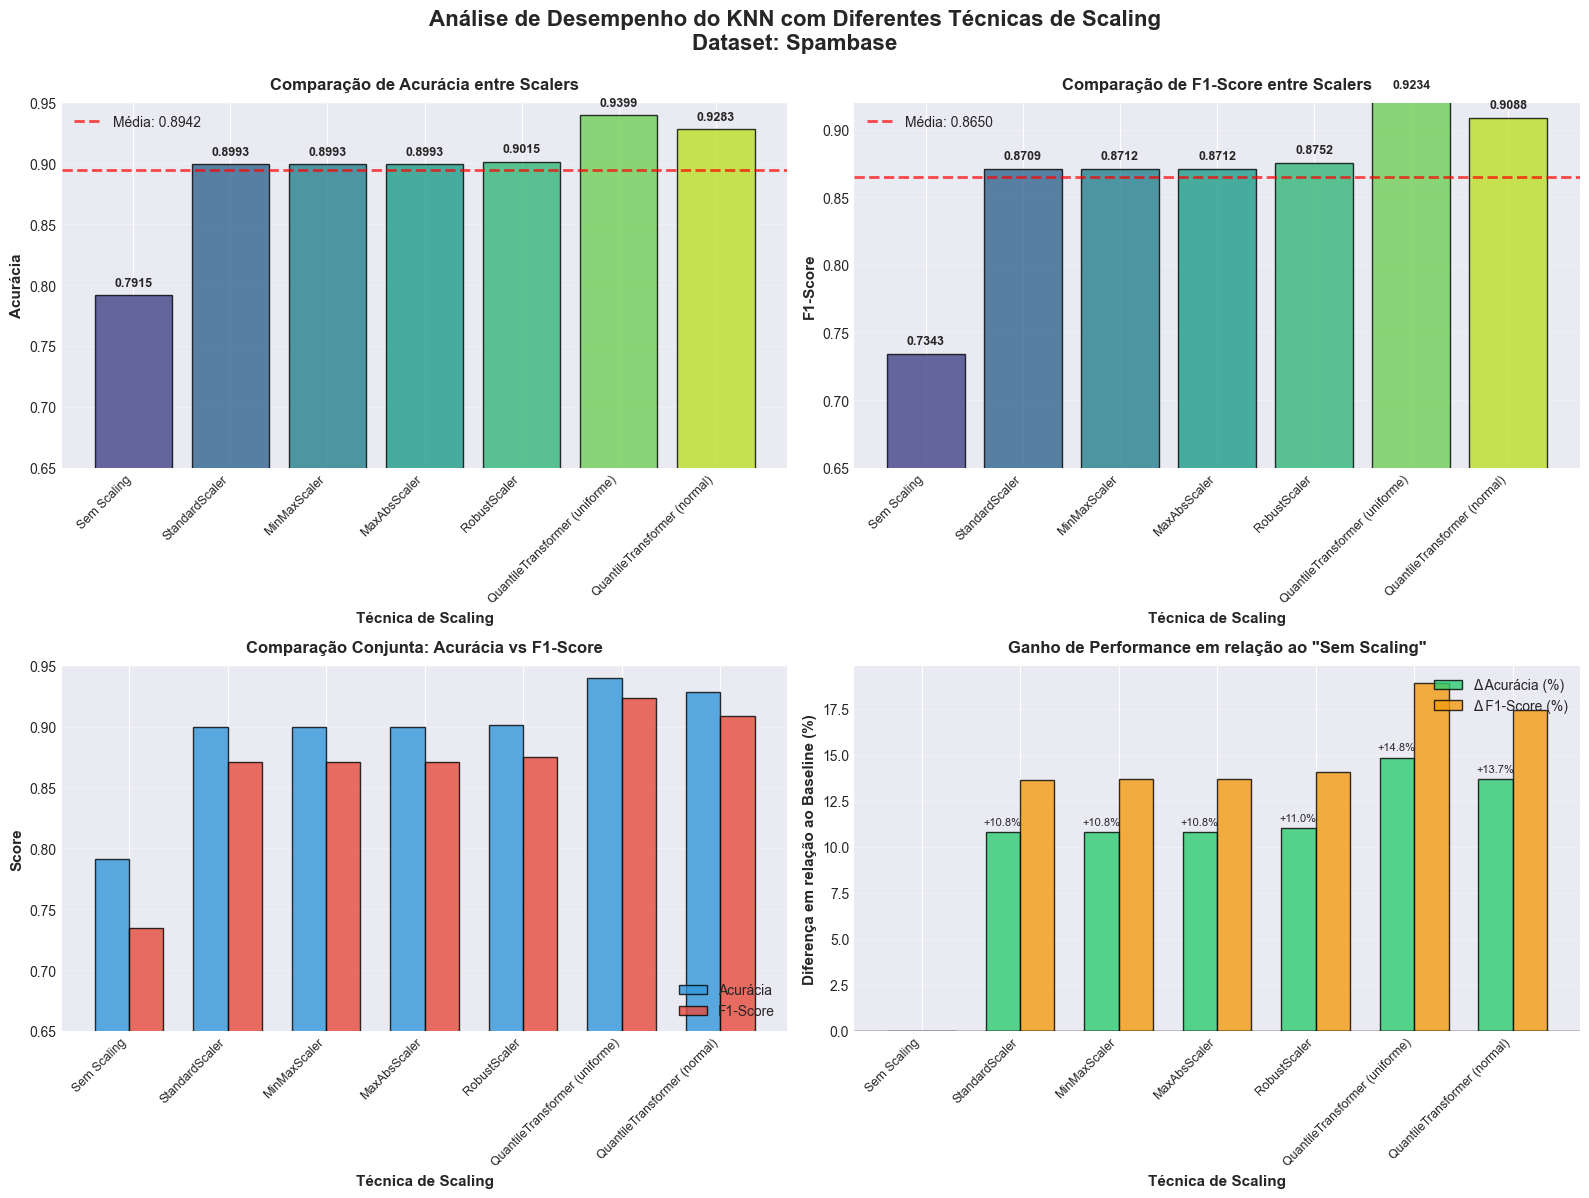

In [118]:
# 6. GRÁFICOS COMPARATIVOS

print("\n[6] GERANDO GRÁFICOS COMPARATIVOS...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análise de Desempenho do KNN com Diferentes Técnicas de Scaling\nDataset: Spambase', 
             fontsize=16, fontweight='bold', y=0.995)

cores = plt.cm.viridis(np.linspace(0.2, 0.9, len(df_resultados)))

# ---- GRÁFICO 1: Acurácia ----
ax1 = axes[0, 0]
bars1 = ax1.bar(range(len(df_resultados)), df_resultados['Acurácia'], color=cores, alpha=0.8, edgecolor='black')
ax1.set_xlabel('Técnica de Scaling', fontsize=11, fontweight='bold')
ax1.set_ylabel('Acurácia', fontsize=11, fontweight='bold')
ax1.set_title('Comparação de Acurácia entre Scalers', fontsize=12, fontweight='bold', pad=10)
ax1.set_xticks(range(len(df_resultados)))
ax1.set_xticklabels(df_resultados['Scaling'], rotation=45, ha='right', fontsize=9)
ax1.set_ylim([0.65, 0.95])
ax1.grid(axis='y', alpha=0.3)
ax1.axhline(y=df_resultados['Acurácia'].mean(), color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'Média: {df_resultados["Acurácia"].mean():.4f}')
ax1.legend()

for i, (bar, valor) in enumerate(zip(bars1, df_resultados['Acurácia'])):
    altura = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., altura + 0.005,
             f'{valor:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# ---- GRÁFICO 2: F1-Score ----
ax2 = axes[0, 1]
bars2 = ax2.bar(range(len(df_resultados)), df_resultados['F1-Score'], color=cores, alpha=0.8, edgecolor='black')
ax2.set_xlabel('Técnica de Scaling', fontsize=11, fontweight='bold')
ax2.set_ylabel('F1-Score', fontsize=11, fontweight='bold')
ax2.set_title('Comparação de F1-Score entre Scalers', fontsize=12, fontweight='bold', pad=10)
ax2.set_xticks(range(len(df_resultados)))
ax2.set_xticklabels(df_resultados['Scaling'], rotation=45, ha='right', fontsize=9)
ax2.set_ylim([0.65, 0.92])
ax2.grid(axis='y', alpha=0.3)
ax2.axhline(y=df_resultados['F1-Score'].mean(), color='red', linestyle='--', 
            linewidth=2, alpha=0.7, label=f'Média: {df_resultados["F1-Score"].mean():.4f}')
ax2.legend()

for i, (bar, valor) in enumerate(zip(bars2, df_resultados['F1-Score'])):
    altura = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., altura + 0.005,
             f'{valor:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# ---- GRÁFICO 3: Comparação Agrupada ----
ax3 = axes[1, 0]
x = np.arange(len(df_resultados))
largura = 0.35

bars_acc = ax3.bar(x - largura/2, df_resultados['Acurácia'], largura, 
                    label='Acurácia', color='#3498db', alpha=0.8, edgecolor='black')
bars_f1 = ax3.bar(x + largura/2, df_resultados['F1-Score'], largura, 
                   label='F1-Score', color='#e74c3c', alpha=0.8, edgecolor='black')

ax3.set_xlabel('Técnica de Scaling', fontsize=11, fontweight='bold')
ax3.set_ylabel('Score', fontsize=11, fontweight='bold')
ax3.set_title('Comparação Conjunta: Acurácia vs F1-Score', fontsize=12, fontweight='bold', pad=10)
ax3.set_xticks(x)
ax3.set_xticklabels(df_resultados['Scaling'], rotation=45, ha='right', fontsize=9)
ax3.set_ylim([0.65, 0.95])
ax3.legend(loc='lower right', fontsize=10)
ax3.grid(axis='y', alpha=0.3)

# ---- GRÁFICO 4: Diferença em relação ao baseline ----
ax4 = axes[1, 1]
baseline_acc = df_resultados[df_resultados['Scaling'] == 'Sem Scaling']['Acurácia'].values[0]
baseline_f1 = df_resultados[df_resultados['Scaling'] == 'Sem Scaling']['F1-Score'].values[0]

diff_acc = (df_resultados['Acurácia'] - baseline_acc) * 100
diff_f1 = (df_resultados['F1-Score'] - baseline_f1) * 100

x = np.arange(len(df_resultados))
bars_diff_acc = ax4.bar(x - largura/2, diff_acc, largura, 
                         label='Δ Acurácia (%)', color='#2ecc71', alpha=0.8, edgecolor='black')
bars_diff_f1 = ax4.bar(x + largura/2, diff_f1, largura, 
                        label='Δ F1-Score (%)', color='#f39c12', alpha=0.8, edgecolor='black')

ax4.set_xlabel('Técnica de Scaling', fontsize=11, fontweight='bold')
ax4.set_ylabel('Diferença em relação ao Baseline (%)', fontsize=11, fontweight='bold')
ax4.set_title('Ganho de Performance em relação ao "Sem Scaling"', fontsize=12, fontweight='bold', pad=10)
ax4.set_xticks(x)
ax4.set_xticklabels(df_resultados['Scaling'], rotation=45, ha='right', fontsize=9)
ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax4.legend(loc='upper right', fontsize=10)
ax4.grid(axis='y', alpha=0.3)

for bar in bars_diff_acc:
    altura = bar.get_height()
    if altura > 0:
        ax4.text(bar.get_x() + bar.get_width()/2., altura + 0.3,
                 f'+{altura:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()



[7] ANÁLISE DETALHADA DO MELHOR MODELO...

Melhor configuração: QuantileTransformer (uniforme)

Relatório de Classificação:
              precision    recall  f1-score   support

    Não-Spam       0.95      0.95      0.95       837
        Spam       0.93      0.92      0.92       544

    accuracy                           0.94      1381
   macro avg       0.94      0.94      0.94      1381
weighted avg       0.94      0.94      0.94      1381



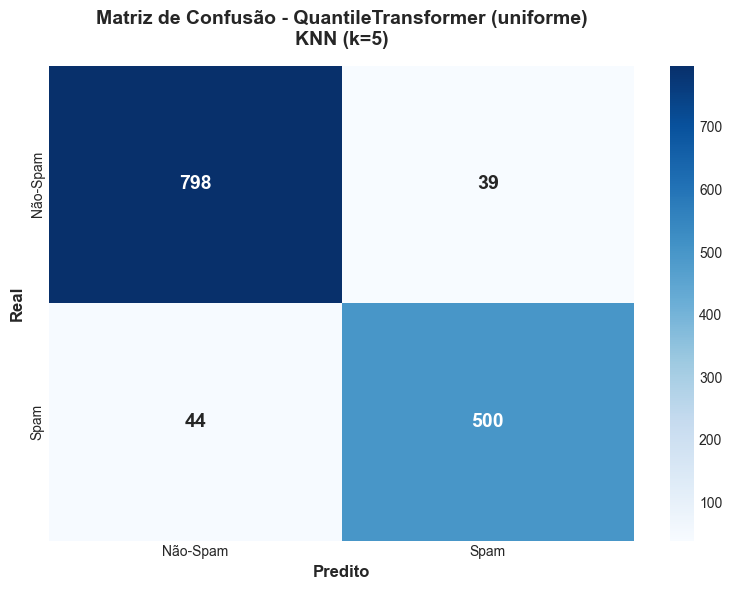

In [119]:
print("\n[7] ANÁLISE DETALHADA DO MELHOR MODELO...")

melhor_scaler_nome = melhor_acuracia['Scaling']
melhor_scaler = scalers[melhor_scaler_nome]

if melhor_scaler is None:
    X_train_best = X_train
    X_test_best = X_test
else:
    X_train_best = melhor_scaler.fit_transform(X_train)
    X_test_best = melhor_scaler.transform(X_test)

knn_best = KNeighborsClassifier(n_neighbors=5)
knn_best.fit(X_train_best, y_train)
y_pred_best = knn_best.predict(X_test_best)

print(f"\nMelhor configuração: {melhor_scaler_nome}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_best, target_names=['Não-Spam', 'Spam']))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_best)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Não-Spam', 'Spam'],
            yticklabels=['Não-Spam', 'Spam'],
            ax=ax, annot_kws={'size': 14, 'weight': 'bold'})
ax.set_xlabel('Predito', fontsize=12, fontweight='bold')
ax.set_ylabel('Real', fontsize=12, fontweight='bold')
ax.set_title(f'Matriz de Confusão - {melhor_scaler_nome}\nKNN (k=5)', 
             fontsize=14, fontweight='bold', pad=15)

plt.tight_layout()
plt.show()